# Examen Parcial n°1 2da Parte - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).


### Criterios de Evaluación:

1. No esta permitido el uso de IAs durante el examen. (Desactivar Copilot o cualquier herramienta de IA para autocompletar codigo.)

2. Se deben utilizar nombres de variables descriptivos y claros (Utilizar la nomeclatura correspondiente para los nombres de variables).

3. Comentarios claros y concisos que expliquen el propósito de cada sección del código en una celda de markdown antes del código.

4. Utilizar mensajes de commit descriptivos. (Puedes utilizar la extension CONVENTIONAL COMMIT de VS-CODE).

5. Entrega en tiempo y forma (Parciales entregados fuera de hora o con commits pasados el horario de entrega quedará invalidado.)

6. Todo el código desarrollado debe ser subido a un repositorio en GitHub (el nombre del repositorio de seguir la siguiente estructura: 
**parcial1_tlp3_nombre_apellido**).

7. Para resolver las actividades se debe insertar casillas de codigo entre cada actividad del cuaderno de Jupyter.

8. Deben trabajar con el datasets adjunto.

9. Una vez finalizado el examen, los resultados deben quedar guardados debajo de cada celda (NO EJECUTAR LA OPCIÓN "borrar todas las salidas").

**Importante:** Una vez finalizado el examen, marcar como completado en el classroom.

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de VOTACIONES en un Datasets.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.

In [4]:
df = pd.read_csv("votaciones.csv")
df.head()

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,pánfilo,pombo,34787190.0,buenos aires,nulo,2024-11-22
1,albina,heredia,48336819.0,santa fe,nulo,2024-04-24
2,NaN,solano,49179364.0,neuquen,nulo,2024-05-20
3,salomé,barrio,43725639.0,buenos aires,NaN,05-06-2024
4,matías,esteban,30599927.0,chaco,no,10-07-2023


In [11]:
df.tail()

,nombre,apellido,dni,provincia,voto,fecha_votacion
96,carla,vidal,15161718.0,misiones,nulo,2023-09-12
97,federico,barrios,16171819.0,neuquen,no,11-09-2023
98,belen,vera,17181920.0,tucuman,sí,2023-09-10
99,gustavo,gauna,18192021.0,santa fe,nulo,09-09-2023
100,rocio,avila,19202122.0,formosa,no,08-09-2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          91 non-null     object 
 1   apellido        94 non-null     object 
 2   dni             90 non-null     float64
 3   provincia       95 non-null     object 
 4   voto            96 non-null     object 
 5   fecha_votacion  95 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB


In [6]:
df.isnull().sum()

nombre            10
apellido           7
dni               11
provincia          6
voto               5
fecha_votacion     6
dtype: int64

### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)
- 3.4: En el caso de los votos, aplicar mayusculas a cada fila.
- 3.5 EL campo DNI debe ser del tipo INT.

In [25]:
df = df.dropna(subset=["nombre", "apellido", "dni", "provincia", "fecha_votacion", "voto"])
df.isnull().sum()

nombre            0
apellido          0
dni               0
provincia         0
voto              0
fecha_votacion    0
dtype: int64

In [26]:
df["fecha_votacion"] = pd.to_datetime(df["fecha_votacion"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 98
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nombre          28 non-null     object        
 1   apellido        28 non-null     object        
 2   dni             28 non-null     int64         
 3   provincia       28 non-null     object        
 4   voto            28 non-null     object        
 5   fecha_votacion  28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.5+ KB


In [19]:
df["nombre"] = df["nombre"].str.capitalize()
df["apellido"] = df["apellido"].str.capitalize()
df.head()

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,Pánfilo,Pombo,34787190.0,buenos aires,nulo,2024-11-22
1,Albina,Heredia,48336819.0,santa fe,nulo,2024-04-24
7,Brígida,Angulo,22169546.0,chaco,no,2024-05-02
10,Verónica,Posada,35293135.0,santa fe,no,2024-09-15
14,Baudelio,Sanabria,24036189.0,tucuman,no,2024-04-04


In [21]:
df["voto"] = df["voto"].str.upper()
df.head()

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,Pánfilo,Pombo,34787190.0,buenos aires,NULO,2024-11-22
1,Albina,Heredia,48336819.0,santa fe,NULO,2024-04-24
7,Brígida,Angulo,22169546.0,chaco,NO,2024-05-02
10,Verónica,Posada,35293135.0,santa fe,NO,2024-09-15
14,Baudelio,Sanabria,24036189.0,tucuman,NO,2024-04-04


In [24]:
df["dni"] = df["dni"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 98
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nombre          28 non-null     object        
 1   apellido        28 non-null     object        
 2   dni             28 non-null     int64         
 3   provincia       28 non-null     object        
 4   voto            28 non-null     object        
 5   fecha_votacion  28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.5+ KB


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

In [27]:
df.describe()

,dni,fecha_votacion
count,2.800000e+01,28
mean,3.716791e+07,2024-01-25 20:34:17.142857216
min,1.122334e+07,2023-05-13 00:00:00
25%,2.124536e+07,2023-09-25 18:00:00
50%,2.714195e+07,2023-10-08 12:00:00
75%,4.550171e+07,2024-05-17 00:00:00
max,9.900112e+07,2025-03-25 00:00:00
std,2.513110e+07,NaN


In [ ]:
df["fecha_votacion"] = df["fecha_votacion"].dt.strftime('%d/%m/%Y')
df.head()

,nombre,apellido,dni,provincia,voto,fecha_votacion
0,Pánfilo,Pombo,34787190,buenos aires,NULO,22/11/2024
1,Albina,Heredia,48336819,santa fe,NULO,24/04/2024
7,Brígida,Angulo,22169546,chaco,NO,02/05/2024
10,Verónica,Posada,35293135,santa fe,NO,15/09/2024
14,Baudelio,Sanabria,24036189,tucuman,NO,04/04/2024


In [34]:
df.groupby(["voto", "provincia"]).describe()

dni                                                       \
                  count          mean           std         min          25%   
voto provincia                                                                 
NO   buenos aires   2.0  1.828070e+07  7.267898e+06  13141516.0  15711106.00   
     chaco          2.0  2.694060e+07  6.747296e+06  22169546.0  24555075.25   
     mendoza        1.0  1.122334e+07           NaN  11223344.0  11223344.00   
     neuquen        1.0  2.909752e+07           NaN  29097522.0  29097522.00   
     salta          1.0  4.455668e+07           NaN  44556677.0  44556677.00   
     santa fe       3.0  3.850223e+07  1.688033e+07  23456789.0  29374962.00   
     tucuman        2.0  4.038970e+07  2.312736e+07  24036189.0  32212946.50   
NULO buenos aires   1.0  3.478719e+07           NaN  34787190.0  34787190.00   
     chaco          1.0  8.907654e+07           NaN  89076542.0  89076542.00   
     cordoba        1.0  7.897898e+07           NaN  78978978.0  78978978.00   
     corrientes     1.0  4.431898e+07           NaN  44318980.0  44318980.00   
     formosa        1.0  9.900112e+07           NaN  99001122.0  99001122.00   
     misiones       1.0  1.516172e+07           NaN  15161718.0  15161718.00   
     salta          1.0  9.012346e+07           NaN  90123456.0  90123456.00   
     santa fe       1.0  4.833682e+07           NaN  48336819.0  48336819.00   
SÍ   cordoba        1.0  2.518638e+07           NaN  25186385.0  25186385.00   
     corrientes     1.0  1.365246e+07           NaN  13652459.0  13652459.00   
     formosa        1.0  2.233446e+07           NaN  22334455.0  22334455.00   
     neuquen        1.0  1.847280e+07           NaN  18472805.0  18472805.00   
     salta          1.0  3.452199e+07           NaN  34521987.0  34521987.00   
     tucuman        3.0  1.838074e+07  4.453403e+06  14649451.0  15915685.50   

                                                        
                          50%          75%         max  
voto provincia                                          
NO   buenos aires  18280696.0  20850286.00  23419876.0  
     chaco         26940604.5  29326133.75  31711663.0  
     mendoza       11223344.0  11223344.00  11223344.0  
     neuquen       29097522.0  29097522.00  29097522.0  
     salta         44556677.0  44556677.00  44556677.0  
     santa fe      35293135.0  46024945.50  56756756.0  
     tucuman       40389704.0  48566461.50  56743219.0  
NULO buenos aires  34787190.0  34787190.00  34787190.0  
     chaco         89076542.0  89076542.00  89076542.0  
     cordoba       78978978.0  78978978.00  78978978.0  
     corrientes    44318980.0  44318980.00  44318980.0  
     formosa       99001122.0  99001122.00  99001122.0  
     misiones      15161718.0  15161718.00  15161718.0  
     salta         90123456.0  90123456.00  90123456.0  
     santa fe      48336819.0  48336819.00  48336819.0  
SÍ   cordoba       25186385.0  25186385.00  25186385.0  
     corrientes    13652459.0  13652459.00  13652459.0  
     formosa       22334455.0  22334455.00  22334455.0  
     neuquen       18472805.0  18472805.00  18472805.0  
     salta         34521987.0  34521987.00  34521987.0  
     tucuman       17181920.0  20246381.00  23310842.0

In [35]:
df.groupby(["voto", "fecha_votacion"]).describe()

dni                                                      \
                    count        mean std         min         25%         50%   
voto fecha_votacion                                                             
NO   02/05/2024       1.0  22169546.0 NaN  22169546.0  22169546.0  22169546.0   
     04/04/2024       1.0  24036189.0 NaN  24036189.0  24036189.0  24036189.0   
     07/10/2023       1.0  56743219.0 NaN  56743219.0  56743219.0  56743219.0   
     09/10/2023       1.0  23419876.0 NaN  23419876.0  23419876.0  23419876.0   
     14/09/2023       1.0  13141516.0 NaN  13141516.0  13141516.0  13141516.0   
     14/10/2023       1.0  23456789.0 NaN  23456789.0  23456789.0  23456789.0   
     15/09/2024       1.0  35293135.0 NaN  35293135.0  35293135.0  35293135.0   
     24/09/2023       1.0  44556677.0 NaN  44556677.0  44556677.0  44556677.0   
     25/08/2024       1.0  31711663.0 NaN  31711663.0  31711663.0  31711663.0   
     26/09/2023       1.0  11223344.0 NaN  11223344.0  11223344.0  11223344.0   
     28/06/2024       1.0  29097522.0 NaN  29097522.0  29097522.0  29097522.0   
     29/09/2023       1.0  56756756.0 NaN  56756756.0  56756756.0  56756756.0   
NULO 05/07/2024       1.0  44318980.0 NaN  44318980.0  44318980.0  44318980.0   
     05/10/2023       1.0  89076542.0 NaN  89076542.0  89076542.0  89076542.0   
     10/10/2023       1.0  90123456.0 NaN  90123456.0  90123456.0  90123456.0   
     12/09/2023       1.0  15161718.0 NaN  15161718.0  15161718.0  15161718.0   
     19/09/2023       1.0  99001122.0 NaN  99001122.0  99001122.0  99001122.0   
     22/11/2024       1.0  34787190.0 NaN  34787190.0  34787190.0  34787190.0   
     24/04/2024       1.0  48336819.0 NaN  48336819.0  48336819.0  48336819.0   
     28/09/2023       1.0  78978978.0 NaN  78978978.0  78978978.0  78978978.0   
SÍ   03/05/2024       1.0  18472805.0 NaN  18472805.0  18472805.0  18472805.0   
     08/10/2023       1.0  34521987.0 NaN  34521987.0  34521987.0  34521987.0   
     10/09/2023       1.0  17181920.0 NaN  17181920.0  17181920.0  17181920.0   
     13/05/2023       1.0  25186385.0 NaN  25186385.0  25186385.0  25186385.0   
     25/03/2025       1.0  23310842.0 NaN  23310842.0  23310842.0  23310842.0   
     25/09/2023       1.0  22334455.0 NaN  22334455.0  22334455.0  22334455.0   
     27/09/2023       1.0  14649451.0 NaN  14649451.0  14649451.0  14649451.0   
     28/12/2024       1.0  13652459.0 NaN  13652459.0  13652459.0  13652459.0   

                                             
                            75%         max  
voto fecha_votacion                          
NO   02/05/2024      22169546.0  22169546.0  
     04/04/2024      24036189.0  24036189.0  
     07/10/2023      56743219.0  56743219.0  
     09/10/2023      23419876.0  23419876.0  
     14/09/2023      13141516.0  13141516.0  
     14/10/2023      23456789.0  23456789.0  
     15/09/2024      35293135.0  35293135.0  
     24/09/2023      44556677.0  44556677.0  
     25/08/2024      31711663.0  31711663.0  
     26/09/2023      11223344.0  11223344.0  
     28/06/2024      29097522.0  29097522.0  
     29/09/2023      56756756.0  56756756.0  
NULO 05/07/2024      44318980.0  44318980.0  
     05/10/2023      89076542.0  89076542.0  
     10/10/2023      90123456.0  90123456.0  
     12/09/2023      15161718.0  15161718.0  
     19/09/2023      99001122.0  99001122.0  
     22/11/2024      34787190.0  34787190.0  
     24/04/2024      48336819.0  48336819.0  
     28/09/2023      78978978.0  78978978.0  
SÍ   03/05/2024      18472805.0  18472805.0  
     08/10/2023      34521987.0  34521987.0  
     10/09/2023      17181920.0  17181920.0  
     13/05/2023      25186385.0  25186385.0  
     25/03/2025      23310842.0  23310842.0  
     25/09/2023      22334455.0  22334455.0  
     27/09/2023      14649451.0  14649451.0  
     28/12/2024      13652459.0  13652459.0


### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.

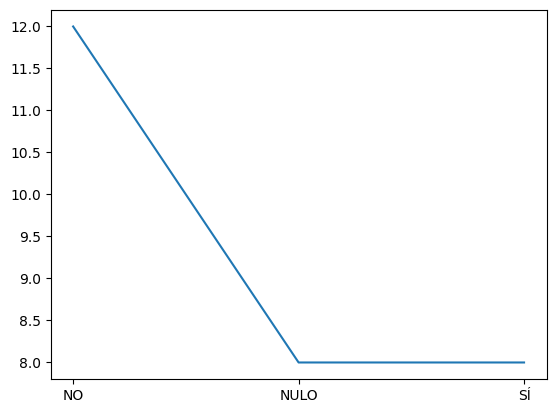

In [42]:
votos = df['voto'].value_counts().sort_index()

plt.plot(votos.index, votos.values)

plt.show()

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Deben hacer una conexión y hacer una consulta para ver si los datos fueron cargados correctamente.